<a href="https://colab.research.google.com/github/kkokay07/Learning-Machine-Learning/blob/main/Regression%20Model/Non_linear_regression_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Non-Linear Regression Models

## What is Non-Linear Regression?

Non-linear regression is a form of regression analysis where the relationship between the independent variables (X) and dependent variable (Y) is modeled by a function that is non-linear in parameters. Unlike linear regression, where the relationship is represented by a straight line, non-linear regression can capture more complex patterns.

## Key Differences from Linear Regression

1. **Model Form**
   - Linear: Y = β₀ + β₁X₁ + β₂X₂ + ... + ε
   - Non-linear: Y = f(X, β) + ε, where f is any non-linear function

2. **Parameter Interpretation**
   - Linear: Parameters represent constant rates of change
   - Non-linear: Parameter effects vary based on input values

3. **Estimation Process**
   - Linear: Closed-form solution available
   - Non-linear: Usually requires iterative optimization

## Common Types of Non-Linear Relationships

1. **Exponential Growth/Decay**
   ```python
   y = a * exp(b * x)
   ```
   Applications:
   - Population growth
   - Radioactive decay
   - Compound interest

2. **Logarithmic**
   ```python
   y = a + b * log(x)
   ```
   Applications:
   - Learning curves
   - Diminishing returns
   - Sound intensity

3. **Power Law**
   ```python
   y = a * x^b
   ```
   Applications:
   - Physical laws
   - Scale relationships
   - Network growth

4. **Sigmoidal/Logistic**
   ```python
   y = L / (1 + exp(-k * (x - x0)))
   ```
   Applications:
   - Population carrying capacity
   - Learning progression
   - Market saturation

## Why Use Non-Linear Regression?

1. **Better Real-World Representation**
   - Natural phenomena rarely follow linear patterns
   - Can capture complex relationships
   - More accurate for many applications

2. **Improved Predictions**
   - Better fits for non-linear patterns
   - More accurate extrapolation
   - Captures diminishing or increasing returns

3. **Scientific Understanding**
   - Models underlying mechanisms
   - Reflects theoretical relationships
   - Provides interpretable parameters

## Example: Population Growth Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate sample data
np.random.seed(42)
x = np.linspace(0, 10, 100)
true_params = [1000, 0.3]  # Initial population, growth rate
y_true = true_params[0] * np.exp(true_params[1] * x)
y_noisy = y_true + np.random.normal(0, y_true * 0.1)

# Define model function
def exp_growth(x, N0, r):
    return N0 * np.exp(r * x)

# Fit model
params, _ = curve_fit(exp_growth, x, y_noisy, p0=[500, 0.1])


## Model Selection Considerations

1. **Data Pattern Analysis**
   - Visual inspection of scatter plots
   - Understanding of domain knowledge
   - Theoretical relationships
   - Residual analysis

2. **Model Complexity**
   - Number of parameters
   - Ease of interpretation
   - Computational requirements
   - Risk of overfitting

3. **Sample Size Requirements**
   - More complex models need more data
   - Parameter stability
   - Estimation precision
   - Validation requirements

## Common Challenges

1. **Starting Value Sensitivity**
   - Initial parameter estimates crucial
   - Multiple local optima possible
   - Convergence issues
   - Solution strategies:

2. **Convergence Issues**
   - Iterative optimization may fail
   - Ill-conditioned problems
   - Parameter interdependence
   - Solution strategies:

True parameters: a=2.000, b=0.500
Fitted parameters: a=1.979, b=0.501
R-squared: 0.999


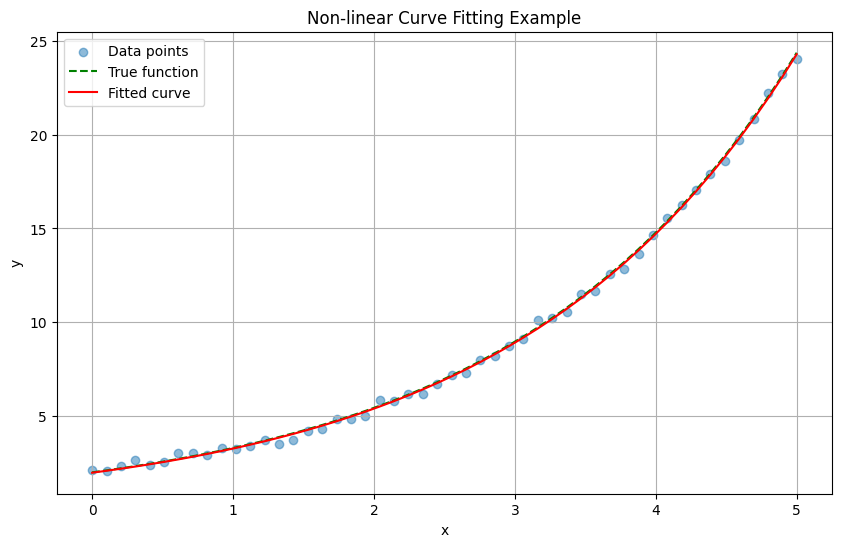

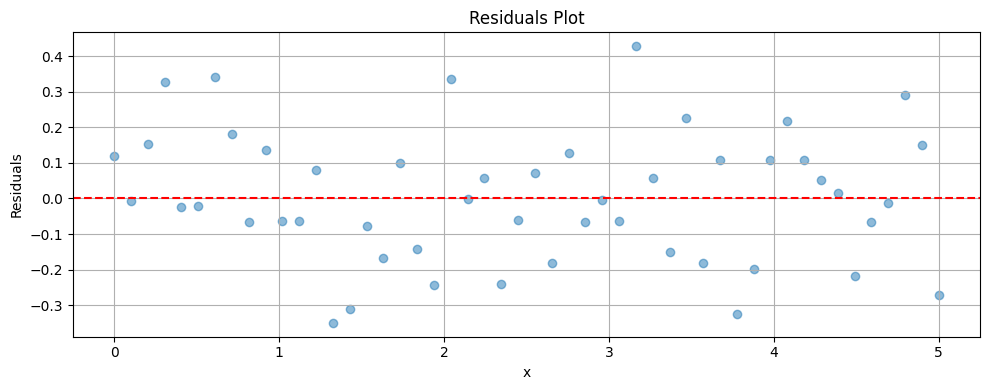

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the model function (exponential growth)
def model_func(x, a, b):
    """
    Exponential growth function: a * exp(b * x)
    Parameters:
    - a: amplitude
    - b: growth rate
    """
    return a * np.exp(b * x)

# Generate sample data
np.random.seed(42)
x = np.linspace(0, 5, 50)
true_a, true_b = 2.0, 0.5  # True parameters
y_true = model_func(x, true_a, true_b)
noise = np.random.normal(0, 0.2, size=len(x))
y = y_true + noise  # Add noise to make it more realistic

# Set bounds for parameters
# a: amplitude must be positive
# b: growth rate between 0 and 1
bounds = ([0, 0], [np.inf, 1])

try:
    # Fit the model with bounds
    params, covariance = curve_fit(
        model_func,
        x, y,
        bounds=bounds,
        method='trf',  # Trust Region Reflective algorithm
        max_nfev=10000,  # Maximum number of function evaluations
        p0=[1.0, 0.3]   # Initial parameter guess
    )

    # Extract fitted parameters
    fitted_a, fitted_b = params

    # Generate points for the fitted curve
    y_fit = model_func(x, fitted_a, fitted_b)

    # Calculate R-squared
    residuals = y - y_fit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data points', alpha=0.5)
    plt.plot(x, y_true, 'g--', label='True function')
    plt.plot(x, y_fit, 'r-', label='Fitted curve')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Non-linear Curve Fitting Example')
    plt.legend()
    plt.grid(True)

    # Print results
    print(f"True parameters: a={true_a:.3f}, b={true_b:.3f}")
    print(f"Fitted parameters: a={fitted_a:.3f}, b={fitted_b:.3f}")
    print(f"R-squared: {r_squared:.3f}")

    # Plot residuals
    plt.figure(figsize=(10, 4))
    plt.scatter(x, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('x')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

except RuntimeError as e:
    print("Error in curve fitting:", str(e))
except ValueError as e:
    print("Invalid value error:", str(e))

3. **Parameter Interpretation**
   - Non-linear parameters have complex effects
   - Interaction between parameters
   - Context-dependent meaning
   - Visualization approach:

In [ ]:
     def plot_parameter_effects(param_range, fixed_params):
         plt.figure(figsize=(12, 6))
         for param_value in param_range:
             params = fixed_params.copy()
             params[0] = param_value
             y_pred = model_func(x, *params)
             plt.plot(x, y_pred, label=f'Param = {param_value}')
         plt.legend()
         plt.show()

## Model Validation Techniques

1. **Residual Analysis**

In [ ]:
   def analyze_residuals(x, y, y_pred):
       residuals = y - y_pred

       plt.figure(figsize=(12, 4))

       # Residual plot
       plt.subplot(121)
       plt.scatter(y_pred, residuals)
       plt.axhline(y=0, color='r', linestyle='--')
       plt.xlabel('Predicted Values')
       plt.ylabel('Residuals')

       # QQ plot
       plt.subplot(122)
       from scipy.stats import probplot
       probplot(residuals, plot=plt)

       plt.tight_layout()
       plt.show()

2. **Cross-Validation**

In [ ]:
   from sklearn.model_selection import KFold

   def cross_validate_nonlinear(model_func, x, y, n_splits=5):
       kf = KFold(n_splits=n_splits)
       scores = []

       for train_idx, test_idx in kf.split(x):
           x_train, x_test = x[train_idx], x[test_idx]
           y_train, y_test = y[train_idx], y[test_idx]

           params, _ = curve_fit(model_func, x_train, y_train)
           y_pred = model_func(x_test, *params)

           score = np.mean((y_test - y_pred)**2)
           scores.append(score)

       return np.mean(scores), np.std(scores)

## Next Steps

After this introduction, we'll dive deep into specific non-linear regression models:

1. Logistic Regression for Binary Outcomes
2. Support Vector Regression (SVR)
3. Decision Tree Regression
4. Random Forest Regression
5. Neural Network Regression